# Data Visualizations

Let's import the cleaned dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


df = pd.read_csv('data/AviationData_CLEAN.csv', index_col=0, low_memory=False)
df.head()

Investigation.Type  Event.Date Injury.Severity Aircraft.damage  \
Event.Id                                                                        
20020909X01562           Accident  1982-01-01       Non-Fatal     Substantial   
20020909X01559           Accident  1982-01-01       Non-Fatal     Substantial   
20020909X01558           Accident  1982-01-01       Non-Fatal     Substantial   
20020917X02134           Accident  1982-01-02        Fatal(1)       Destroyed   
20020917X02119           Accident  1982-01-02        Fatal(1)       Destroyed   

                  Make    Model  Number.of.Engines    Engine.Type  \
Event.Id                                                            
20020909X01562  cessna      140                1.0  Reciprocating   
20020909X01559   piper  pa28161                1.0  Reciprocating   
20020909X01558   beech     v35b                1.0  Reciprocating   
20020917X02134  cessna    r172k                1.0  Reciprocating   
20020917X02119  navion        a                1.0  Reciprocating   

               Purpose.of.flight  Total.Fatal.Injuries  \
Event.Id                                                 
20020909X01562          Personal                   0.0   
20020909X01559          Personal                   0.0   
20020909X01558          Personal                   0.0   
20020917X02134          Personal                   1.0   
20020917X02119          Personal                   1.0   

                Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
Event.Id                                                                        
20020909X01562                     0.0                   0.0              2.0   
20020909X01559                     0.0                   0.0              1.0   
20020909X01558                     0.0                   0.0              1.0   
20020917X02134                     0.0                   0.0              0.0   
20020917X02119                     0.0                   0.0              0.0   

               Weather.Condition Broad.phase.of.flight   Report.Status  \
Event.Id                                                                 
20020909X01562               VMC               Takeoff  Probable Cause   
20020909X01559               VMC              Approach  Probable Cause   
20020909X01558               VMC               Landing  Probable Cause   
20020917X02134               IMC               Takeoff  Probable Cause   
20020917X02119               IMC                Cruise  Probable Cause   

                  Maker_Model General_Maker_Model  Total_On_Board  
Event.Id                                                           
20020909X01562     cessna_140          cessna_140             2.0  
20020909X01559  piper_pa28161          piper_pa28             1.0  
20020909X01558     beech_v35b            beech_35             1.0  
20020917X02134   cessna_r172k          cessna_172             1.0  
20020917X02119       navion_a            navion_a             1.0

In [17]:
df = df.dropna()

In [20]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53266 entries, 20020909X01562 to 20221230106513
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      53266 non-null  object        
 1   Event.Date              53266 non-null  datetime64[ns]
 2   Injury.Severity         53266 non-null  object        
 3   Aircraft.damage         53266 non-null  object        
 4   Make                    53266 non-null  object        
 5   Model                   53266 non-null  object        
 6   Number.of.Engines       53266 non-null  float64       
 7   Engine.Type             53266 non-null  object        
 8   Purpose.of.flight       53266 non-null  object        
 9   Total.Fatal.Injuries    53266 non-null  float64       
 10  Total.Serious.Injuries  53266 non-null  float64       
 11  Total.Minor.Injuries    53266 non-null  float64       
 12  Total.Uninjured         53266

In [22]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() * 100 / len(df)).round(2)

Investigation.Type        0.0
Event.Date                0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Make                      0.0
Model                     0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Broad.phase.of.flight     0.0
Report.Status             0.0
Maker_Model               0.0
General_Maker_Model       0.0
Total_On_Board            0.0
dtype: float64

### Let's plot 'Aircraft.Damage' attribute against others

#### Purpose of Flight

In [23]:
# Calculate value counts
purpose_value_counts = df['Purpose.of.flight'].value_counts()

# Filter the DataFrame
purpose_df = df[df['Purpose.of.flight'].isin(purpose_value_counts[purpose_value_counts >= 20].index)]
purpose_df.shape

(53233, 19)

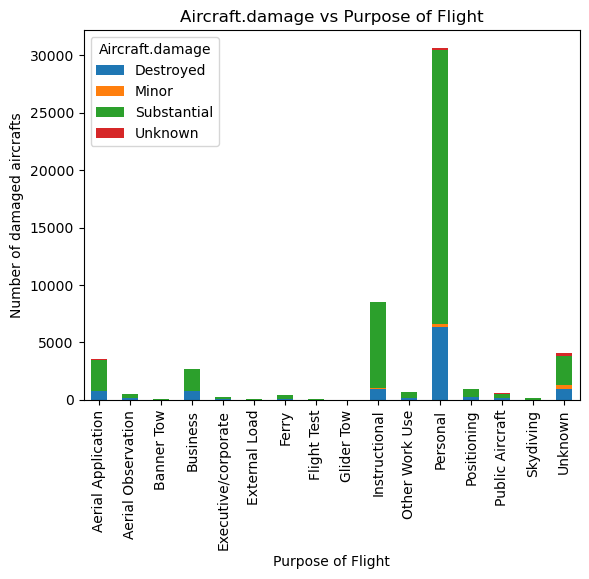

In [24]:
# Create a bar plot
purpose_df.groupby(['Purpose.of.flight', 'Aircraft.damage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of damaged aircrafts')
plt.title('Aircraft.damage vs Purpose of Flight')
plt.show()

#### Number of Engines

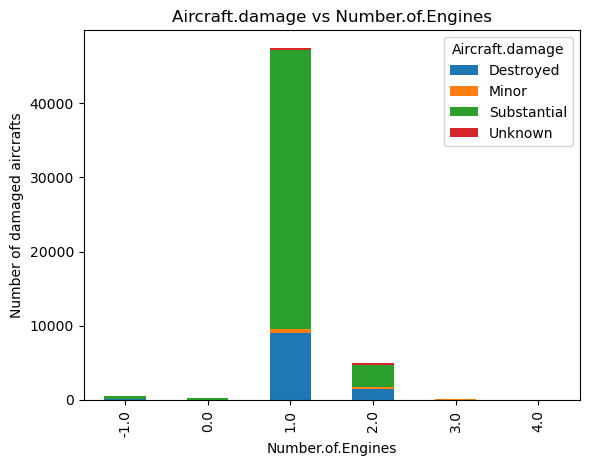

In [25]:
df.groupby(['Number.of.Engines', 'Aircraft.damage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Number.of.Engines')
plt.ylabel('Number of damaged aircrafts')
plt.title('Aircraft.damage vs Number.of.Engines')
plt.show()

#### Broad Phase of Flight

In [26]:
df.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Broad.phase.of.flight')
plt.ylabel('Number of damaged aircrafts')
plt.title('Aircraft.damage vs Broad.phase.of.flight')
plt.show()

#### Engine Type

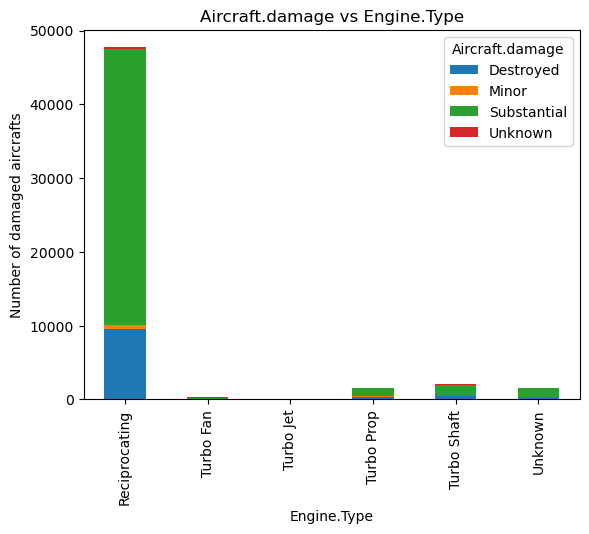

In [27]:
df.groupby(['Engine.Type', 'Aircraft.damage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Engine.Type')
plt.ylabel('Number of damaged aircrafts')
plt.title('Aircraft.damage vs Engine.Type')
plt.show()

#### Weather Condition

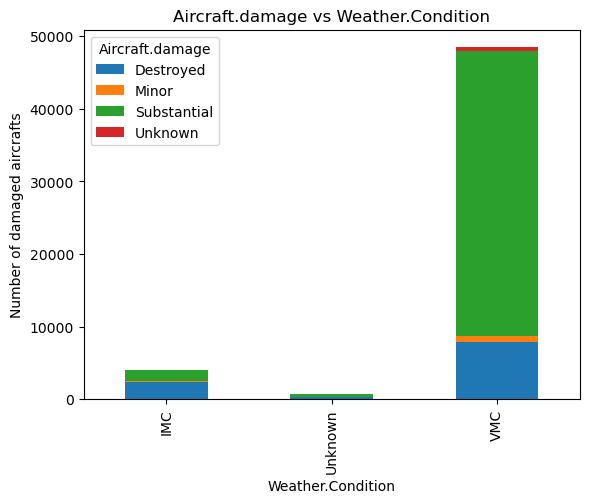

In [28]:
df.groupby(['Weather.Condition', 'Aircraft.damage']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Weather.Condition')
plt.ylabel('Number of damaged aircrafts')
plt.title('Aircraft.damage vs Weather.Condition')
plt.show()

Let's calculate the likelyhood of the aircraft being destroyed in different weather conditions

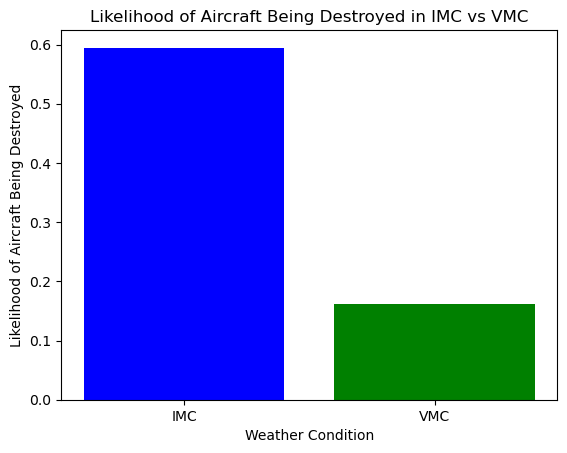

In [29]:
# Filter the DataFrame for IMC and VMC conditions
imc_df = df[df['Weather.Condition'] == 'IMC']
vmc_df = df[df['Weather.Condition'] == 'VMC']

# Calculate the number of destroyed aircraft in each condition
destroyed_imc = imc_df[imc_df['Aircraft.damage'] == 'Destroyed'].shape[0]
destroyed_vmc = vmc_df[vmc_df['Aircraft.damage'] == 'Destroyed'].shape[0]

# Calculate the total number of aircraft in each condition
total_imc = imc_df.shape[0]
total_vmc = vmc_df.shape[0]

# Calculate the likelihood
likelihood_imc = destroyed_imc / total_imc if total_imc > 0 else 0
likelihood_vmc = destroyed_vmc / total_vmc if total_vmc > 0 else 0

# Plot the results
conditions = ['IMC', 'VMC']
likelihoods = [likelihood_imc, likelihood_vmc]

plt.bar(conditions, likelihoods, color=['blue', 'green'])
plt.xlabel('Weather Condition')
plt.ylabel('Likelihood of Aircraft Being Destroyed')
plt.title('Likelihood of Aircraft Being Destroyed in IMC vs VMC')
plt.show()

## Let's get top 10 aircraft models with the highest proportion destroyed in accidents

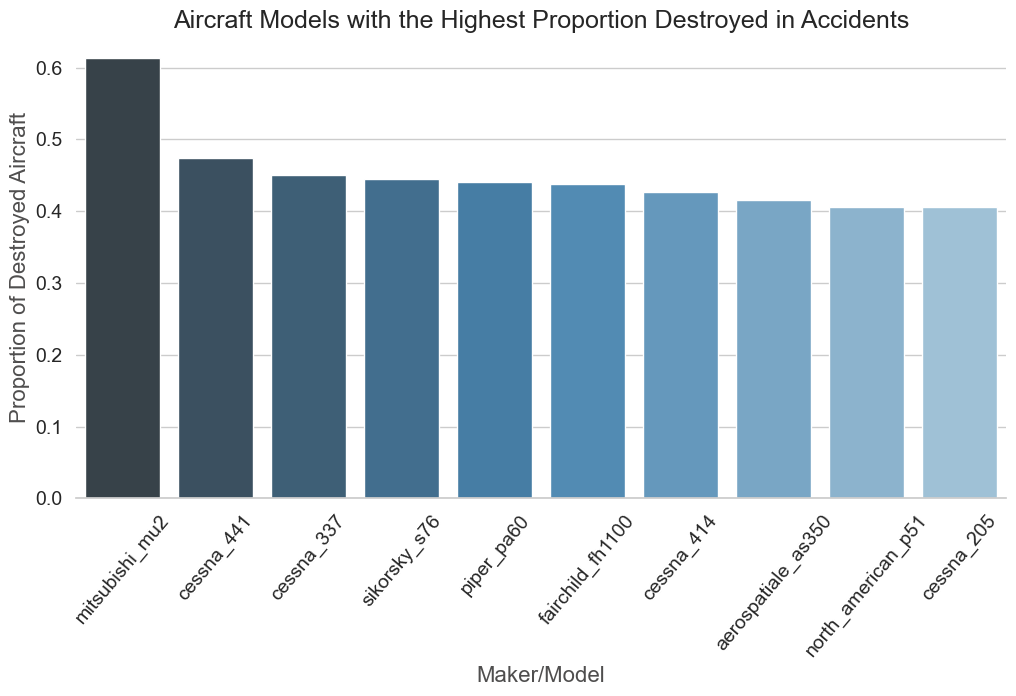

In [31]:
# Calculate the percentage of 'Destroyed' aircraft for each General_Maker_Model
damage_counts = df.groupby('General_Maker_Model')['Aircraft.damage'].value_counts(normalize=True).unstack().fillna(0)
#damage_counts['Destroyed_Percentage'] = damage_counts['Destroyed'] * 100
damage_counts['Destroyed_Percentage'] = damage_counts['Destroyed'] 

# Sort by Destroyed_Percentage and select the top 10
top_10_damage_counts = damage_counts.sort_values(by='Destroyed_Percentage', ascending=False).head(10)

# Reverse the color palette
reversed_palette = sns.color_palette('Blues_d', n_colors=10)[::-1]

# Plot the data using Seaborn
# Change the Size of the Chart
plt.figure(figsize=(12, 6))

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 360

# add horizontal grid lines to the background
sns.set(style="whitegrid")

sns.barplot(x=top_10_damage_counts.index, y=top_10_damage_counts['Destroyed_Percentage'], hue=top_10_damage_counts.index, dodge=False, palette=reversed_palette, legend=False)
plt.xlabel('Maker/Model', size=16, color='#4f4e4e')
# Change the color of y-axis and x-axis labels to dark grey
plt.ylabel('Proportion of Destroyed Aircraft', size=16, color='#4f4e4e')
plt.title('Aircraft Models with the Highest Proportion Destroyed in Accidents', size=18)
plt.xticks(rotation=50)

# Make the Axis Tick Labels Bigger
plt.xticks(size=14)
plt.yticks(size=14)

# Remove Top and Right Border
#sns.despine()
# Remove Left Border
sns.despine(left=True)

plt.show()

## Let's get top 10 aircraft models with the highest proportion of fatal injuries

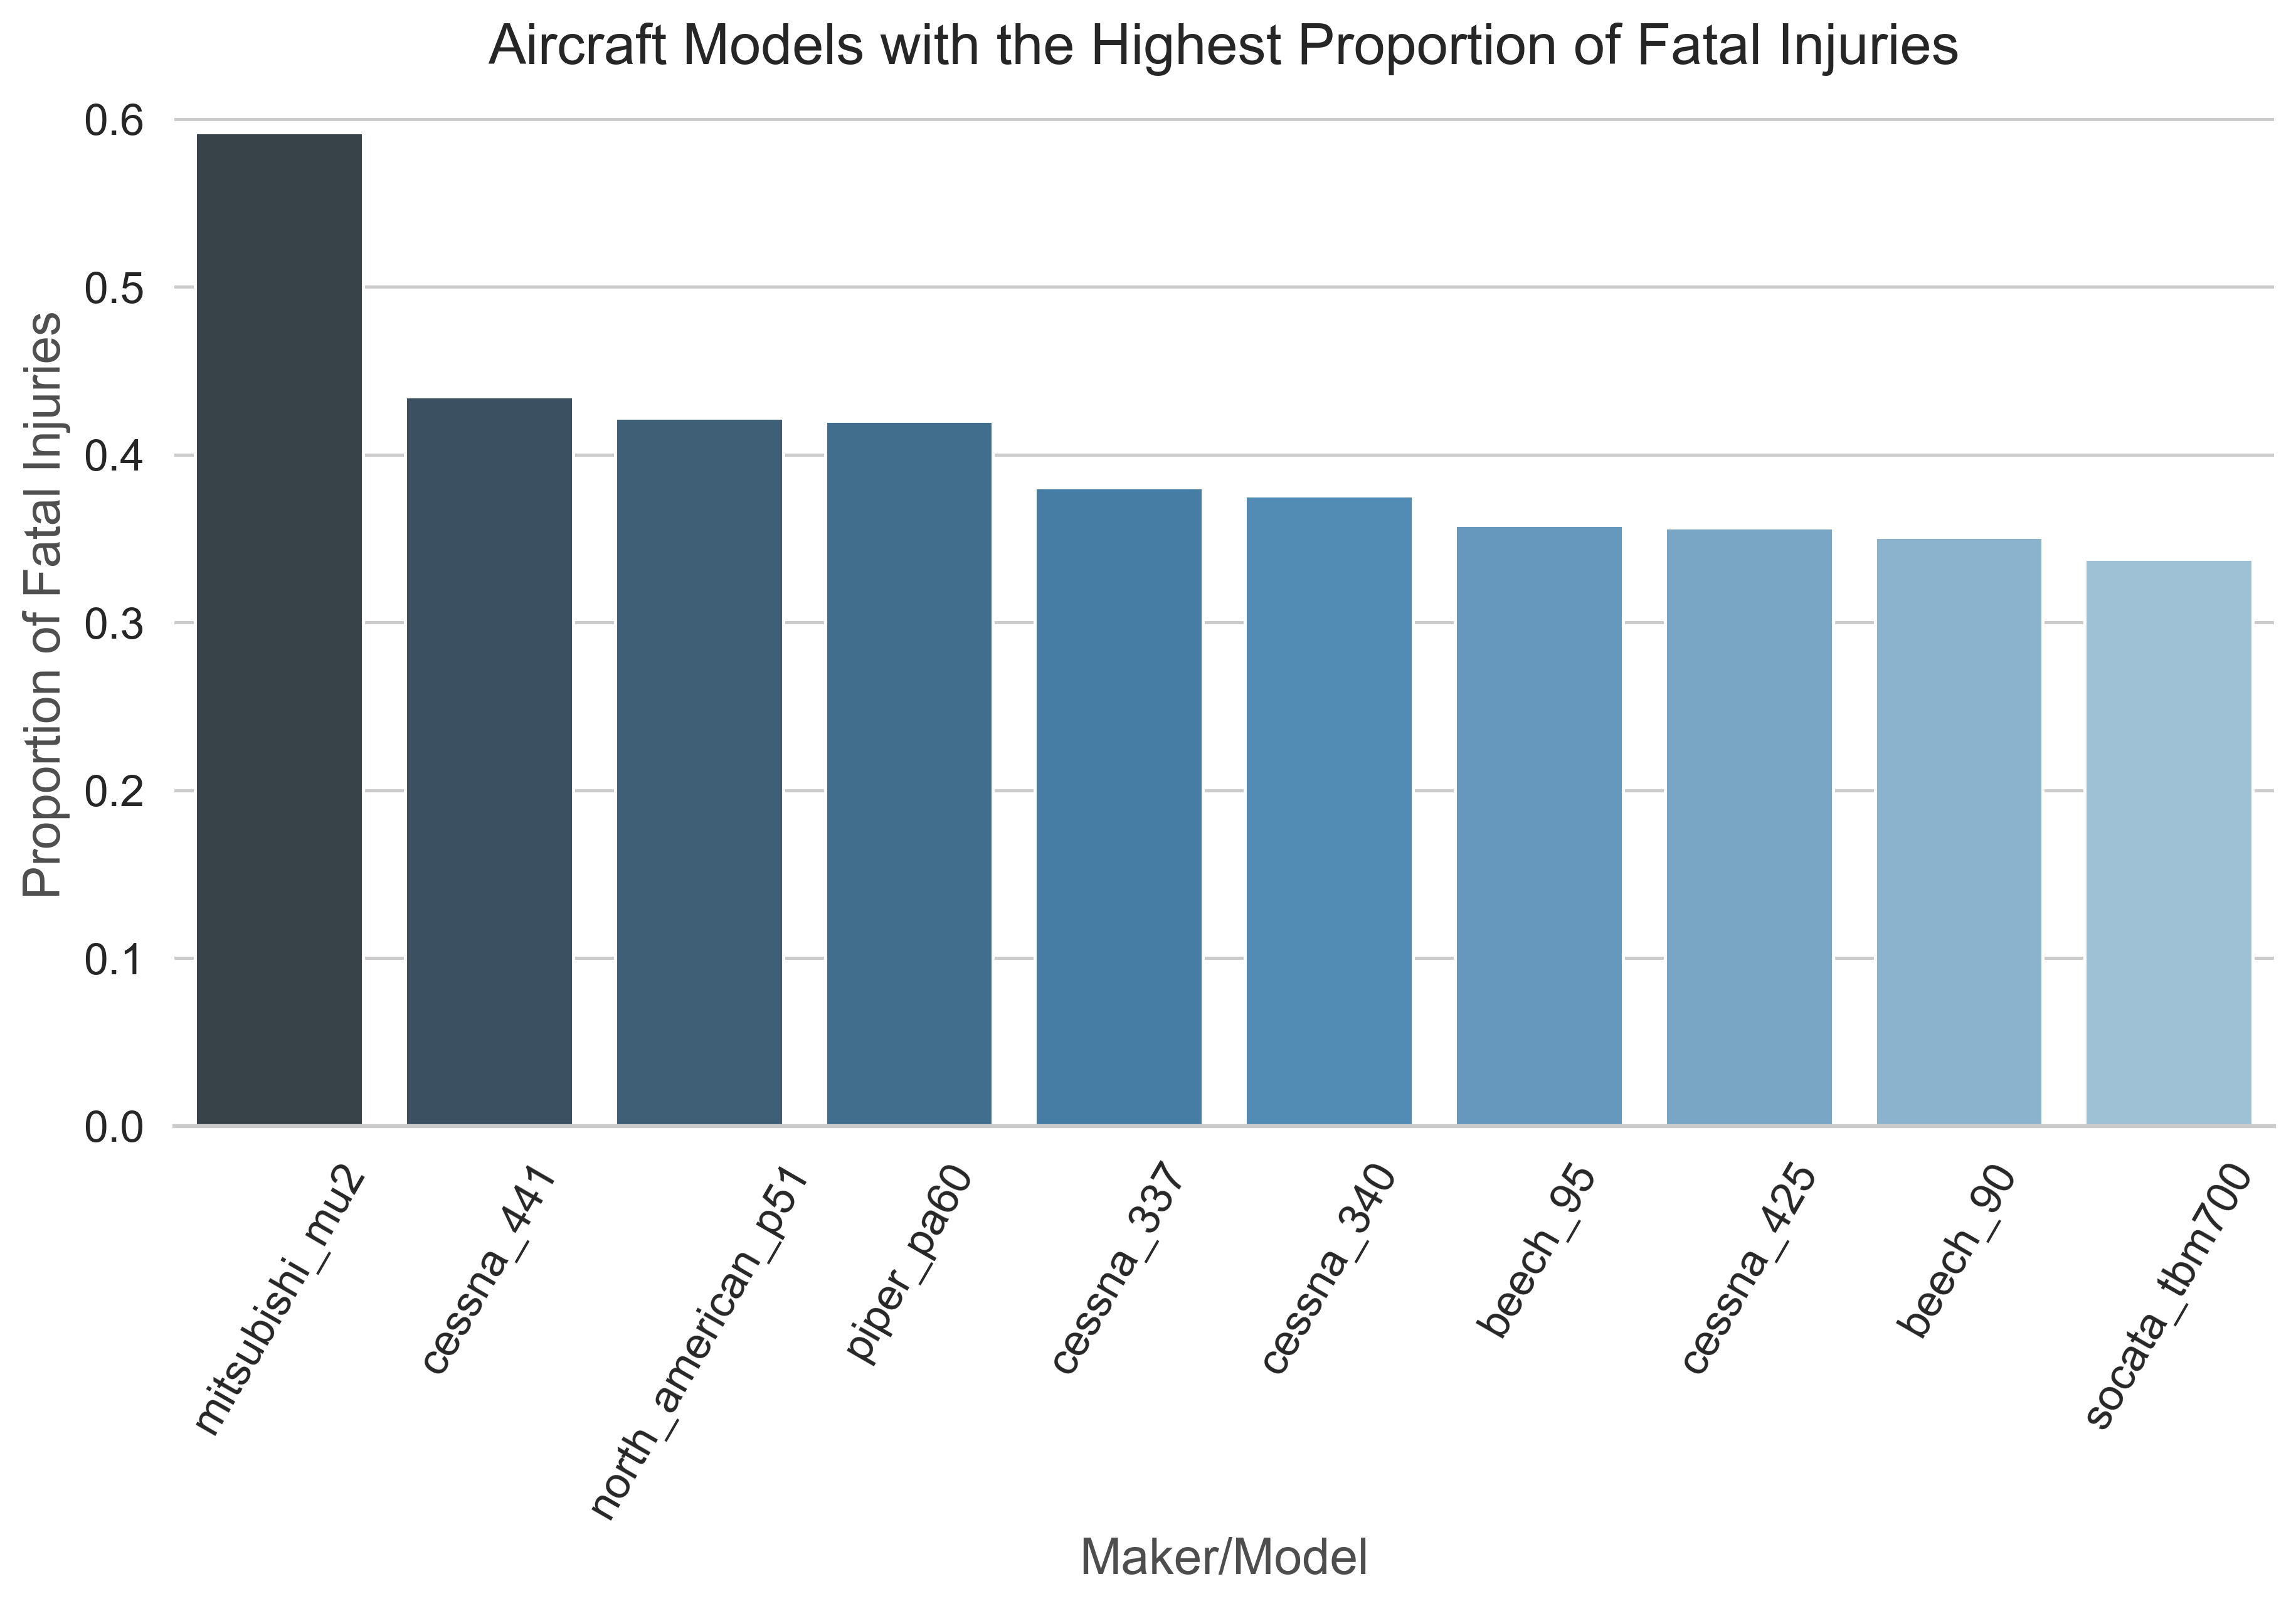

In [32]:
# Calculate the proportion of Total.Fatal.Injuries out of Total_On_Board
df.loc[:, 'Proportion_Fatal'] = df['Total.Fatal.Injuries'] / df['Total_On_Board'] 

# Group by General_Maker_Model and calculate the mean proportion
grouped_df = df.groupby('General_Maker_Model')['Proportion_Fatal'].mean().reset_index()

# Sort by Proportion_Fatal and select the top 10
top_10_df = grouped_df.sort_values(by='Proportion_Fatal', ascending=False).head(10)

# Reverse the color palette
reversed_palette = sns.color_palette('Blues_d', n_colors=10)[::-1]

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 360

# Add horizontal grid lines to the background
sns.set(style="whitegrid")

# Use the correct hue parameter
sns.barplot(x='General_Maker_Model', y='Proportion_Fatal', data=top_10_df, hue='General_Maker_Model', palette=reversed_palette, dodge=False)
plt.xlabel('Maker/Model', size=16, color='#4f4e4e')
plt.ylabel('Proportion of Fatal Injuries', size=16, color='#4f4e4e')
plt.title('Aircraft Models with the Highest Proportion of Fatal Injuries', size=18)
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

# Make the Axis Tick Labels Bigger
plt.xticks(size=14)
plt.yticks(size=14)

# Remove Top and Right Border
sns.despine(left=True)

# Hide the legend
plt.legend([],[], frameon=False)

plt.show()

In [38]:
df['General_Maker_Model'].value_counts().get('mitsubishi_mu2', 0)

31

## Let's get top 10 aircraft models with the lowest proportion of fatal injuries

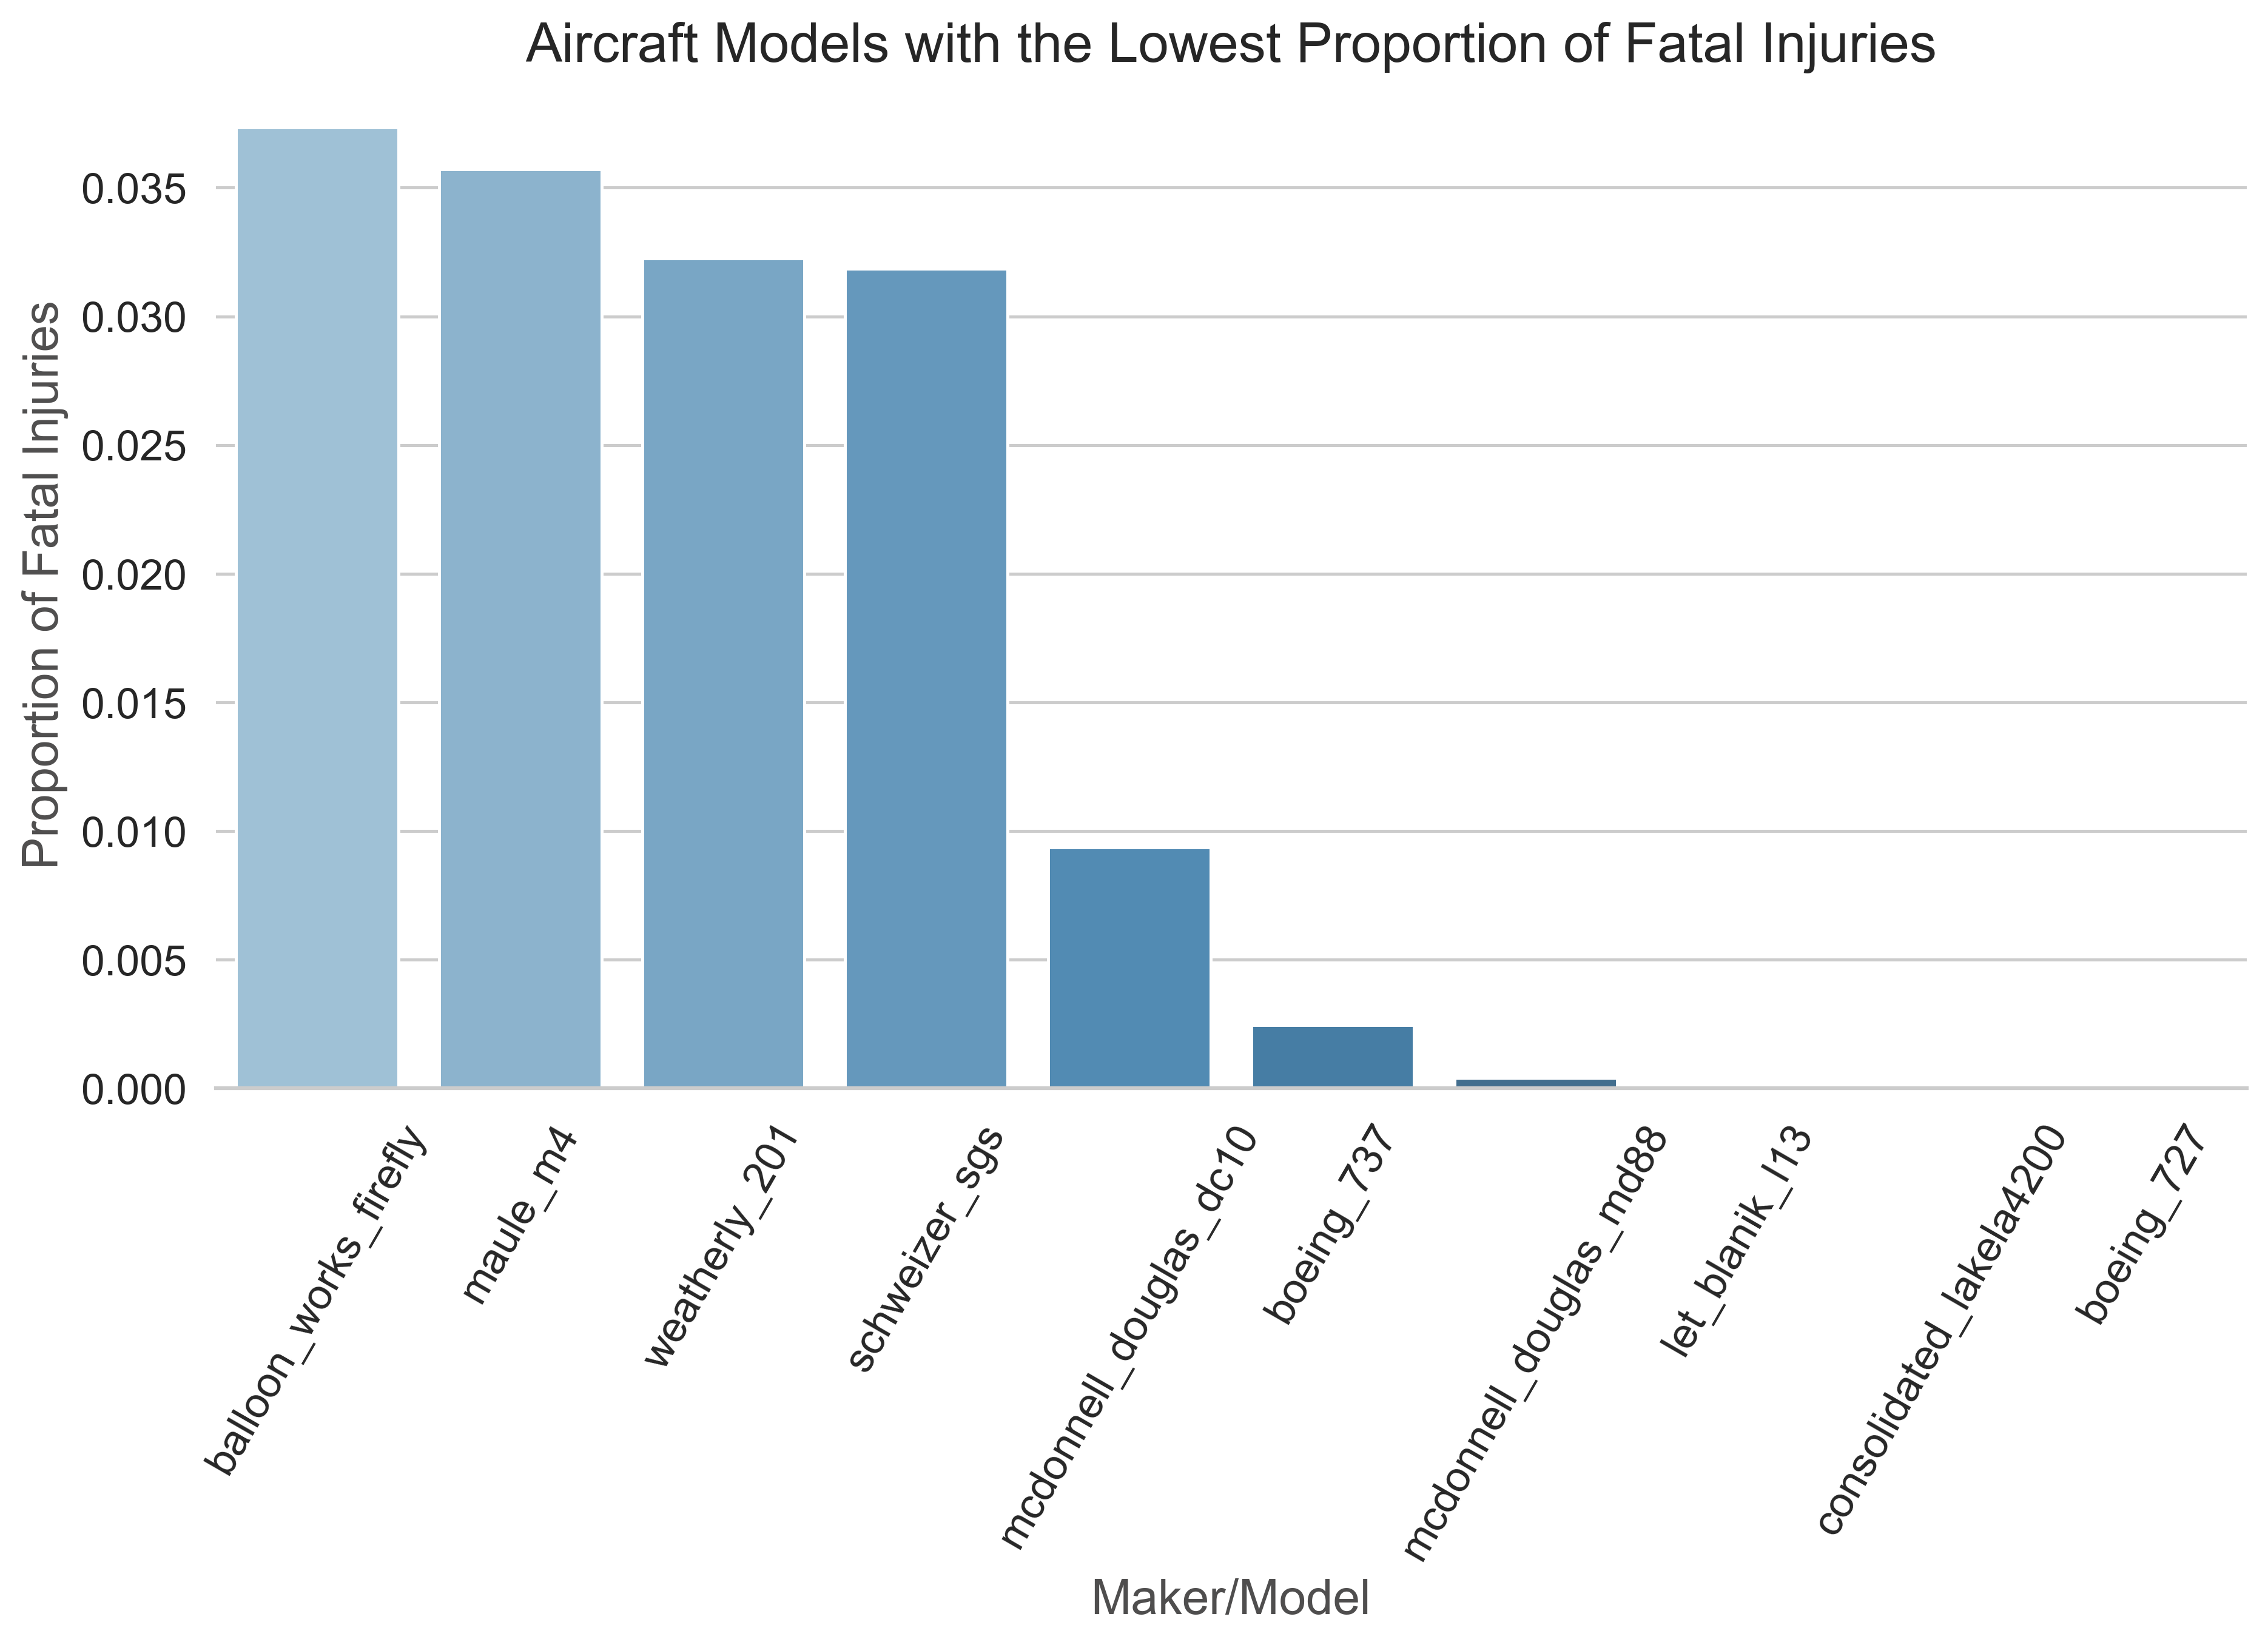

In [33]:
# Calculate the proportion of Total.Fatal.Injuries out of Total_On_Board
df.loc[:, 'Proportion_Fatal'] = df['Total.Fatal.Injuries'] / df['Total_On_Board'] 

# Group by General_Maker_Model and calculate the mean proportion
grouped_df = df.groupby('General_Maker_Model')['Proportion_Fatal'].mean().reset_index()

# Sort by Proportion_Fatal and select the top 10
top_10_df = grouped_df.sort_values(by='Proportion_Fatal', ascending=False).tail(10)

# Use the original color palette
original_palette = sns.color_palette('Blues_d', n_colors=10)
#original_palette = sns.color_palette(['#000080', '#00008B', '#0000CD', '#0000FF', '#1E90FF', '#4169E1', '#4682B4', '#5F9EA0', '#6495ED', '#87CEFA'])


# Plot the data using Seaborn
plt.figure(figsize=(12, 6))

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 360

# Add horizontal grid lines to the background
sns.set(style="whitegrid")

# Use the correct hue parameter
sns.barplot(x='General_Maker_Model', y='Proportion_Fatal', data=top_10_df, hue='General_Maker_Model', palette=original_palette, dodge=False)
plt.xlabel('Maker/Model', size=16, color='#4f4e4e')
plt.ylabel('Proportion of Fatal Injuries', size=16, color='#4f4e4e')
plt.title('Aircraft Models with the Lowest Proportion of Fatal Injuries', size=18)
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

# Make the Axis Tick Labels Bigger
plt.xticks(size=14)
plt.yticks(size=14)

# Remove Top and Right Border
sns.despine(left=True)

# Hide the legend
plt.legend([],[], frameon=False)

plt.show()

In [34]:
df[df['General_Maker_Model']=='balloon_works_firefly']

Investigation.Type Event.Date Injury.Severity Aircraft.damage  \
Event.Id                                                                       
20020917X02927           Accident 1982-05-20       Non-Fatal     Substantial   
20020917X02772           Accident 1982-07-05       Non-Fatal     Substantial   
20020917X04680           Accident 1982-10-02       Non-Fatal         Unknown   
20020917X04676           Accident 1982-10-04       Non-Fatal     Substantial   
20001214X42945           Accident 1983-05-30       Non-Fatal         Unknown   
20001214X43009           Accident 1983-05-30       Non-Fatal     Substantial   
20001214X43265           Accident 1983-06-18        Fatal(1)     Substantial   
20001214X43870           Accident 1983-07-02       Non-Fatal     Substantial   
20001214X44780           Accident 1983-10-09       Non-Fatal         Unknown   
20001214X45045           Accident 1983-11-11       Non-Fatal         Unknown   
20001214X45294           Accident 1983-12-03       Non-Fatal     Substantial   
20001214X39310           Accident 1984-04-07       Non-Fatal     Substantial   
20001214X39606           Accident 1984-05-27       Non-Fatal         Unknown   
20001214X39876           Accident 1984-06-23       Non-Fatal           Minor   
20001214X40072           Accident 1984-06-23       Non-Fatal     Substantial   
20001214X41174           Accident 1984-09-11       Non-Fatal     Substantial   
20001214X35923           Accident 1985-03-17       Non-Fatal       Destroyed   
20001214X36978           Accident 1985-07-02       Non-Fatal     Substantial   
20001214X37084           Accident 1985-07-23       Non-Fatal       Destroyed   
20001214X37588           Accident 1985-08-10       Non-Fatal         Unknown   
20001214X37768           Accident 1985-09-01       Non-Fatal         Unknown   
20001214X37990           Accident 1985-10-29       Non-Fatal     Substantial   
20001213X32860           Accident 1986-02-23       Non-Fatal     Substantial   
20001213X34150           Accident 1986-07-05       Non-Fatal         Unknown   
20001213X30222           Accident 1987-02-11       Non-Fatal         Unknown   
20001213X30428           Accident 1987-03-26       Non-Fatal     Substantial   
20001213X31091           Accident 1987-06-06        Fatal(1)     Substantial   
20001213X31440           Accident 1987-07-12       Non-Fatal     Substantial   
20001213X32019           Accident 1987-09-07       Non-Fatal           Minor   
20001213X32305           Accident 1987-10-05       Non-Fatal     Substantial   
20001213X25803           Accident 1988-05-14       Non-Fatal         Unknown   
20001213X26375           Accident 1988-07-18       Non-Fatal     Substantial   
20001213X27035           Accident 1988-10-04       Non-Fatal     Substantial   
20001213X29208           Accident 1989-08-08       Non-Fatal     Substantial   
20001213X29892           Accident 1989-11-19       Non-Fatal     Substantial   
20001212X18370           Accident 1991-10-19        Fatal(1)     Substantial   
20001211X12649           Accident 1993-06-12       Non-Fatal           Minor   
20001211X13552           Accident 1993-10-09        Fatal(2)       Destroyed   
20001206X02520           Accident 1994-10-29       Non-Fatal         Unknown   
20001207X03942           Accident 1995-07-08       Non-Fatal         Unknown   
20001207X04345           Accident 1995-08-06       Non-Fatal     Substantial   
20001207X04490           Accident 1995-09-02       Non-Fatal         Unknown   
20001208X06513           Accident 1996-08-24       Non-Fatal     Substantial   
20001208X08323           Accident 1997-07-04       Non-Fatal     Substantial   
20001211X10884           Accident 1998-08-29       Non-Fatal         Unknown   
20001211X11239           Accident 1998-10-08       Non-Fatal         Unknown   
20001212X18871           Accident 1999-05-23       Non-Fatal         Unknown   
20071102X01711           Accident 2007-10-15       Non-Fatal         Unknown   
20170224X82547 

In [35]:
df['General_Maker_Model'].value_counts().get('balloon_works_firefly', 0)

50

## Are risks higher in poor weather?

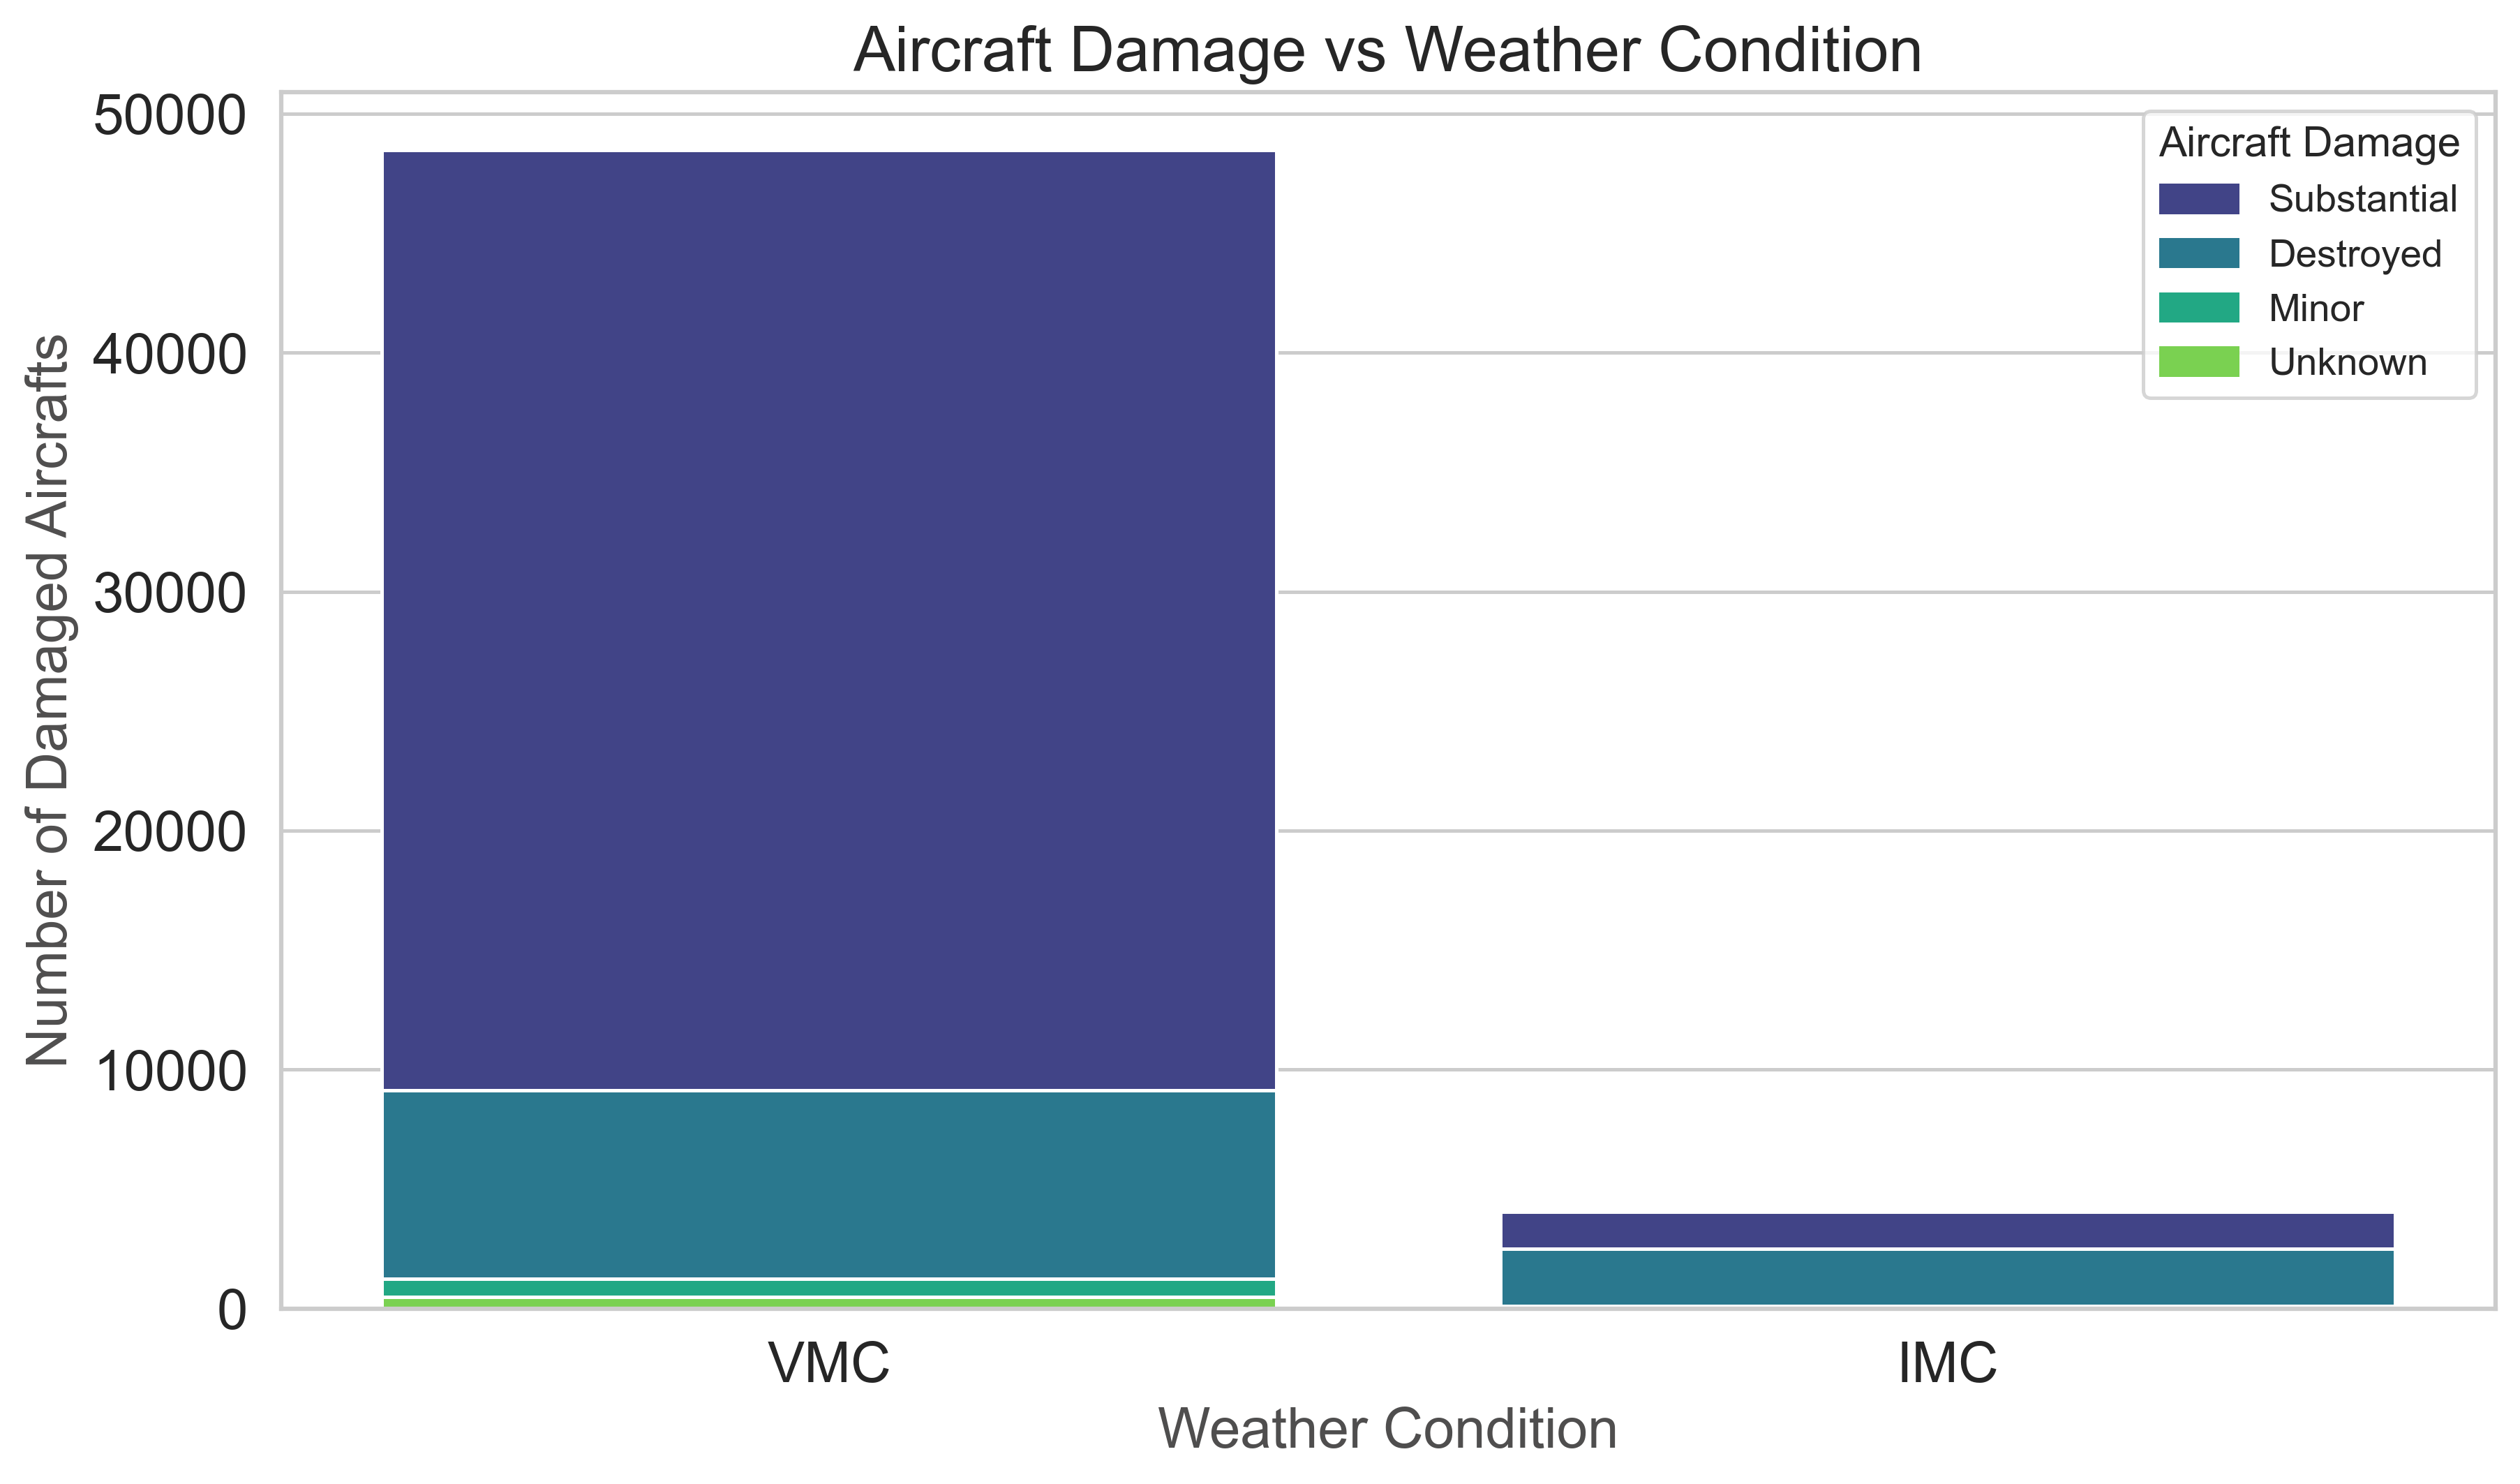

In [36]:
# Filter out rows where Weather.Condition is unknown
filtered_df = df[df['Weather.Condition'] != 'Unknown']

# Create the plot
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=filtered_df, x='Weather.Condition', hue='Aircraft.damage', multiple='stack', palette='viridis', shrink=0.8, alpha=1)

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 360

# Customize the plot
plot.set_facecolor('white')
plot.grid(axis='x', visible=False)  # Remove vertical grid lines
plot.grid(axis='y', visible=True)   # Keep horizontal grid lines

# Manually create legend with actual colors
color_palette = sns.color_palette('viridis', n_colors=4)
color_explanations = {
    'Substantial': color_palette[0],
    'Destroyed': color_palette[1],
    'Minor': color_palette[2],
    'Unknown': color_palette[3]
}

# Create custom legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_explanations.items()]

plt.legend(handles=legend_patches, title='Aircraft Damage', loc='upper right')

plt.xlabel('Weather Condition', size=16, color='#4f4e4e')
plt.ylabel('Number of Damaged Aircrafts', size=16, color='#4f4e4e')
plt.title('Aircraft Damage vs Weather Condition', size=18)
plt.xticks(rotation=0)
plt.tight_layout()

# Make the Axis Tick Labels Bigger
plt.xticks(size=16)
plt.yticks(size=16)


plt.show()

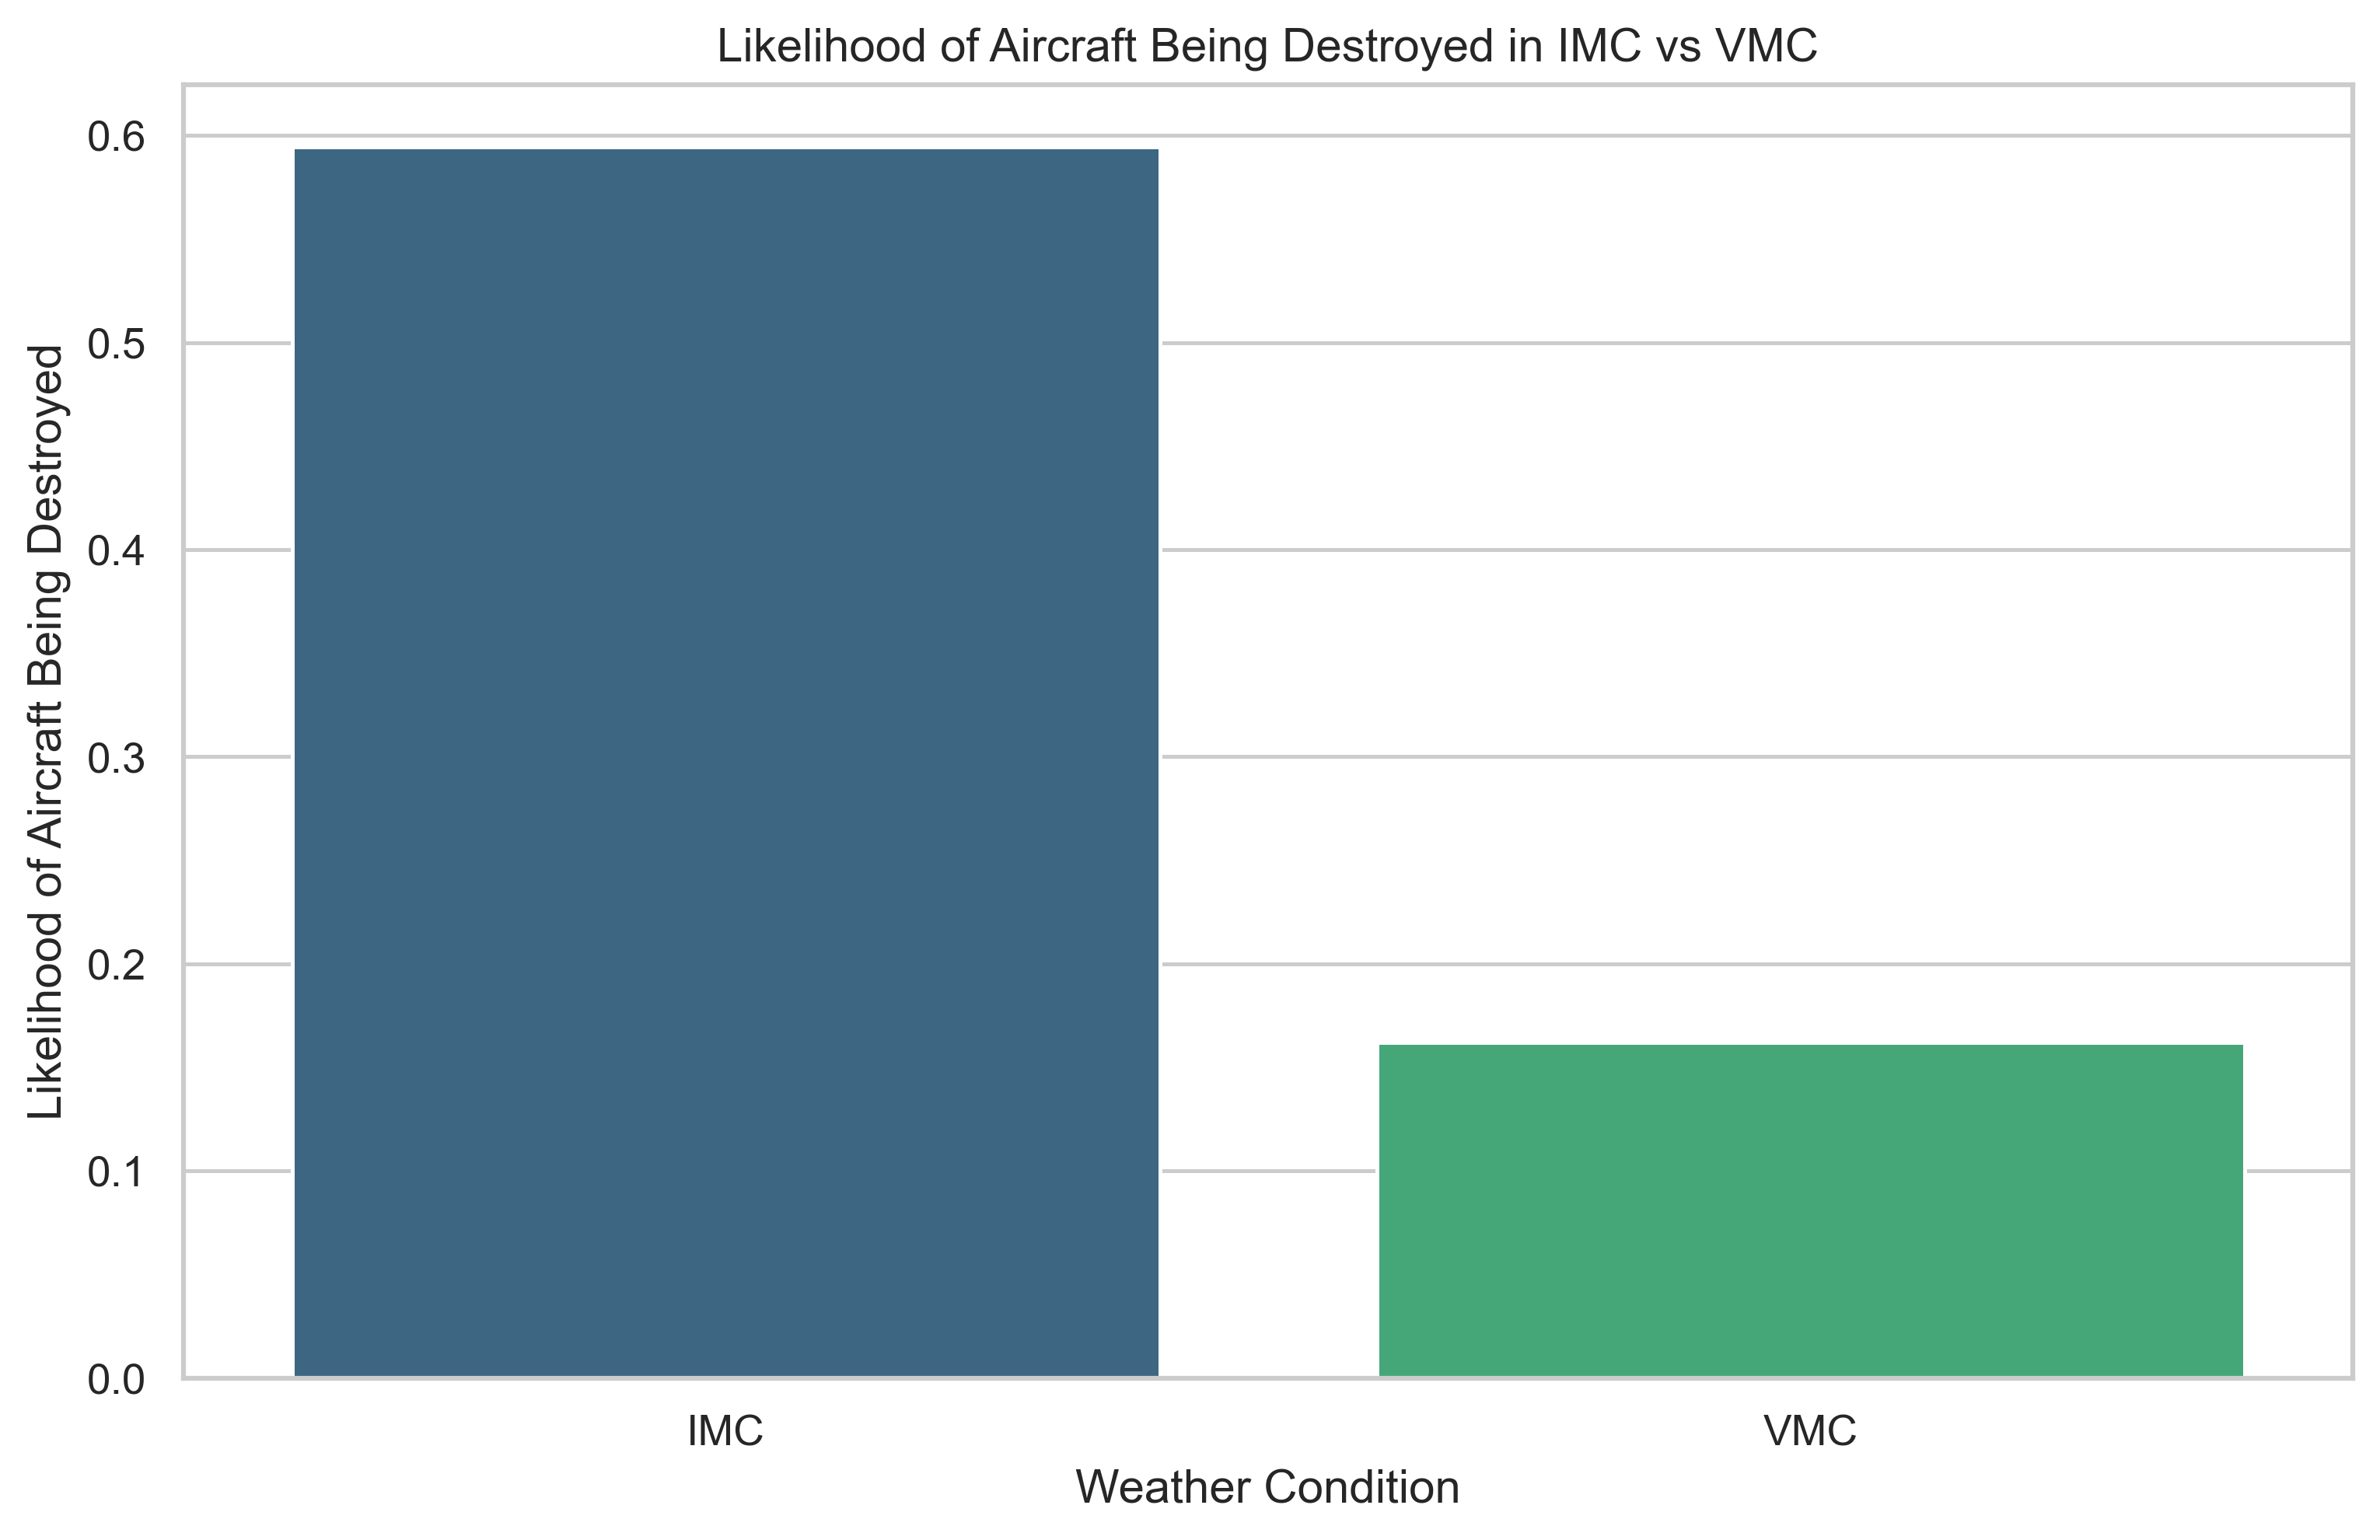

In [37]:
# Filter the DataFrame for IMC and VMC conditions
imc_df = df[df['Weather.Condition'] == 'IMC']
vmc_df = df[df['Weather.Condition'] == 'VMC']

# Calculate the number of destroyed aircraft in each condition
destroyed_imc = imc_df[imc_df['Aircraft.damage'] == 'Destroyed'].shape[0]
destroyed_vmc = vmc_df[vmc_df['Aircraft.damage'] == 'Destroyed'].shape[0]

# Calculate the total number of aircraft in each condition
total_imc = imc_df.shape[0]
total_vmc = vmc_df.shape[0]

# Calculate the likelihood
likelihood_imc = destroyed_imc / total_imc if total_imc > 0 else 0
likelihood_vmc = destroyed_vmc / total_vmc if total_vmc > 0 else 0

# Prepare data for plotting
data = {
    'Weather Condition': ['IMC', 'VMC'],
    'Likelihood of Aircraft Being Destroyed': [likelihood_imc, likelihood_vmc]
}

# Create a DataFrame
plot_df = pd.DataFrame(data)

# Define the color palette
color_palette = sns.color_palette('viridis', n_colors=2)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Condition', y='Likelihood of Aircraft Being Destroyed', hue='Weather Condition', data=plot_df, palette=color_palette, dodge=False, legend=False)

# Customize the plot
plt.xlabel('Weather Condition')
plt.ylabel('Likelihood of Aircraft Being Destroyed')
plt.title('Likelihood of Aircraft Being Destroyed in IMC vs VMC')
plt.show()


**Based on the above findings, we can make the following recommendations:**
* Avoid purchasing aircraft models with high fatality and destruction rates;
* Invest in pilot training and maintenance for operations in IMC to mitigate risk.
